# Bank Churn Modelling

CustomerId: Unique identifier for the customer.

Surname: Surname of the customer.

CreditScore: Credit score of the customer.

Geography: Country of residence.

Gender: Gender of the customer.

Age: Age of the customer.

Tenure: Number of years the customer has been with the bank.

Balance: Account balance.

Num Of Products: Number of bank products the customer uses.

Has Credit Card: Whether the customer has a credit card (1 = Yes, 0 = No).

Is Active Member: Whether the customer is an active member (1 = Yes, 0 = No).

Estimated Salary: Estimated salary of the customer.

Churn: Whether the customer has churned (1 = Yes, 0 = No).

In [1]:
import pandas as pd

In [2]:
# Load the data
file_path = 'https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Bank%20Churn%20Modelling.csv'
data = pd.read_csv(file_path)

In [6]:
# Display the first few rows of the dataset
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


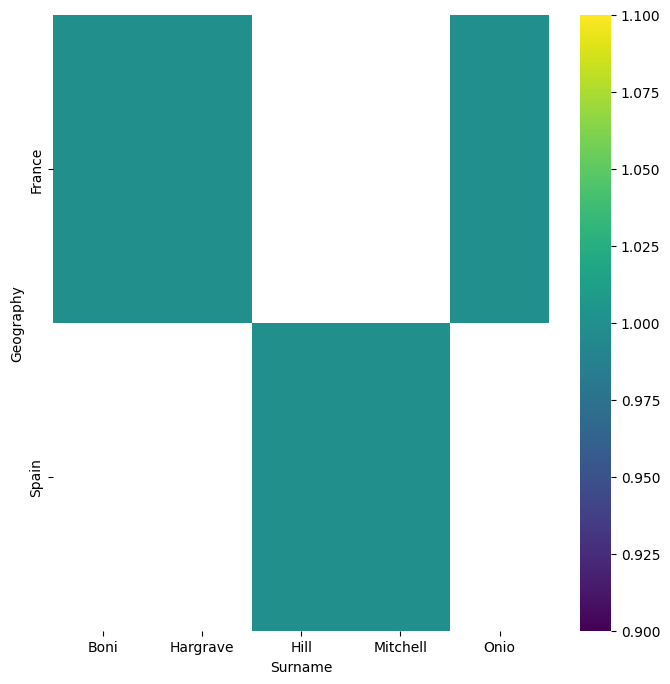

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Geography'].value_counts()
    for x_label, grp in _df_14.groupby('Surname')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Surname')
_ = plt.ylabel('Geography')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [9]:
# Separate the features and the target variable
X = data.drop(columns=['CustomerId', 'Surname', 'Churn'])
y = data['Churn']

In [10]:
# Identifying categorical and numerical columns
categorical_cols = ['Geography', 'Gender']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [11]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Applying preprocessing to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [15]:
# Train the Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predict on the test set
y_pred = clf.predict(X_test_processed)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8635